In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../salary_data.csv")

In [5]:
df_copy = df.copy()

In [6]:
df_copy

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [12]:
new_df = df_copy.loc[:, ["Age", "Years of Experience", "Salary"]]

In [ ]:
new_df

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
370,35.0,8.0,85000.0
371,43.0,19.0,170000.0
372,29.0,2.0,40000.0
373,34.0,7.0,90000.0


In [32]:
new_df.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [33]:
new_df[new_df["Age"].isnull()]

,Age,Years of Experience,Salary


In [34]:
new_df.dropna(inplace=True)

In [35]:
new_df.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [37]:
new_df["Age"] = new_df["Age"].astype("int64")
new_df["Years of Experience"] = new_df["Years of Experience"].astype("int64")
new_df["Salary"] = new_df["Salary"].astype("int64")

In [38]:
new_df

,Age,Years of Experience,Salary
0,32,5,90000
1,28,3,65000
2,45,15,150000
3,36,7,60000
4,52,20,200000
...,...,...,...
370,35,8,85000
371,43,19,170000
372,29,2,40000
373,34,7,90000


In [46]:
new_df.to_csv("salary_yoe_age.csv",index=False)

In [47]:
df = pd.read_csv("salary_yoe_age.csv")

In [48]:
df.head()

,Age,Years of Experience,Salary
0,32,5,90000
1,28,3,65000
2,45,15,150000
3,36,7,60000
4,52,20,200000


In [49]:
df.shape

(373, 3)

In [50]:
df.isna().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

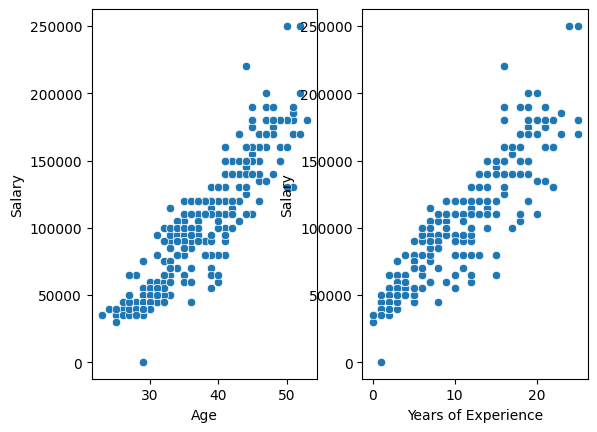

In [51]:
plt.subplot(1,2,1)
sns.scatterplot(x="Age",y="Salary",data=df)

plt.subplot(1,2,2)
sns.scatterplot(x="Years of Experience",y="Salary",data=df)

plt.show()

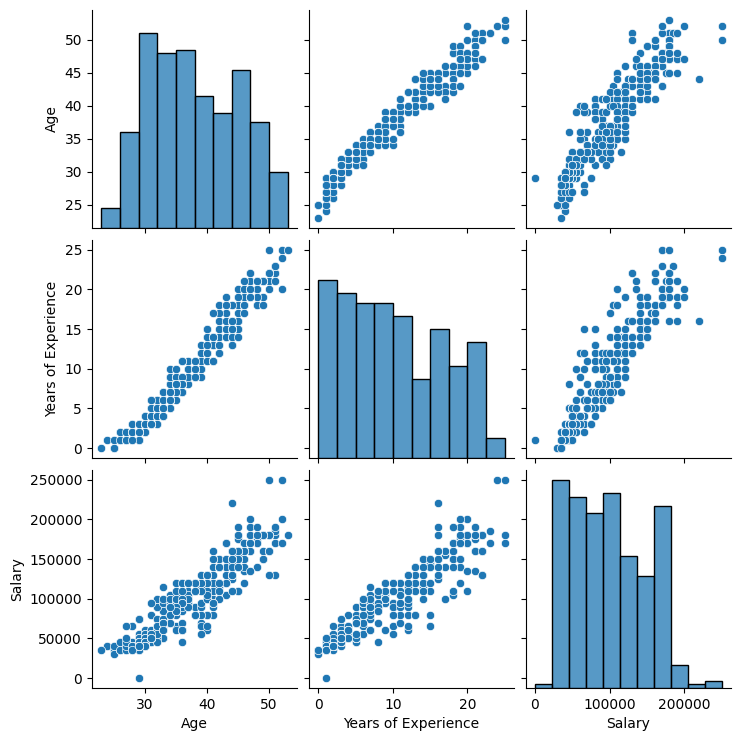

In [52]:
sns.pairplot(data=df)
plt.show()

<Axes: >

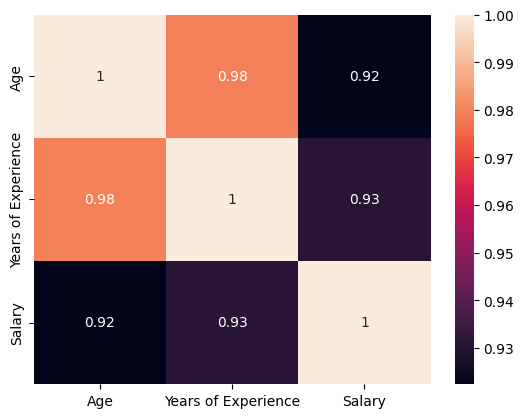

In [53]:
sns.heatmap(data=df.corr(),annot=True)

In [54]:
df.head()

,Age,Years of Experience,Salary
0,32,5,90000
1,28,3,65000
2,45,15,150000
3,36,7,60000
4,52,20,200000


In [61]:
x = df.iloc[:,0:2]

In [72]:
x

,Age,Years of Experience
0,32,5
1,28,3
2,45,15
3,36,7
4,52,20
...,...,...
368,35,8
369,43,19
370,29,2
371,34,7


In [73]:
x.ndim

2

In [67]:
y = df["Salary"]

In [68]:
y

0       90000
1       65000
2      150000
3       60000
4      200000
        ...  
368     85000
369    170000
370     40000
371     90000
372    150000
Name: Salary, Length: 373, dtype: int64

In [100]:
df.head()

,Age,Years of Experience,Salary
0,32,5,90000
1,28,3,65000
2,45,15,150000
3,36,7,60000
4,52,20,200000


In [101]:
df.shape

(373, 3)

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [71]:
from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression()

In [88]:
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
lr.score(x_test,y_test)

0.888456679468486

In [90]:
lr.coef_

array([2602.37269846, 4052.83314806])

In [91]:
lr.intercept_

-38125.26476471334

In [99]:
lr.predict(x_test)

array([171898.12087062, 103895.60195579, 141224.46433647,  74672.40587124,
       142674.92478607, 149330.1306326 , 181155.6994156 ,  93486.11116196,
        54706.78833168,  94638.02341081, 123861.21949536, 174500.49356908,
        37642.09169132,  92035.65071235, 133118.79804034,  54706.78833168,
        65414.82732626,  36191.63124171,  78725.23901931,  85380.44486583,
       101293.22925733,  94638.02341081, 143826.83703492,  68017.20002472,
        74672.40587124,  56157.24878128, 154534.87602951,  42846.83708824,
       118656.47409844, 150780.5910822 ,  46899.6702363 , 125311.67994496,
        52104.41563322, 137171.6311884 , 101293.22925733,  21729.30729982,
       169295.74817216,  48051.58248515, 146727.75793414,  58759.62147974,
        48051.58248515,  94638.02341081, 193314.19885979, 163792.45457449,
        42846.83708824, 141224.46433647, 100141.31700848,  40244.46438978,
        45449.20978669,  42846.83708824, 155985.33647912,  82778.07216737,
       129065.96489227, 1

In [107]:
test_this = pd.DataFrame({"Age" : [32],"Years of Experience":[5]})
predicted_salary = lr.predict(test_this)
predicted_salary


array([65414.82732626])

In [109]:
lr.predict([[32,5]])

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65414.82732626])